# Respuesta a preguntas de Sueldos 

In [2]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import pandas as pd
import requests
import os
import lxml.html as lh

In [3]:
sueldos  = pd.read_excel('/home/echeveste/Mis_trabajos/analisis_datos/da2019-Oscar2401/Semana2/Trabajos/tabulador_pe2019.xls',header=9)

In [4]:
sueldos.head()

,NIVEL,TIPO,PUESTO,SUELDO BASE,CUOTAS SEGURIDAD SOCIAL,PREVISIÓN SOCIAL,AYUDA X SERVICIOS,APOYO FAMILIAR,GRATIFICACIÓN QUINCENAL,SUELDO MENSUAL BRUTO,IMPTO MENSUAL,ISSEG,ISSSTE,SUELDO MENSUAL NETO,PRIMA VACACIONAL,AGUINALDO
0,22,NaN,GOBERNADOR/A DEL ESTADO,59804.327930,5843.07,1913.1,25897,64294.837780,75373.99,233126.325711,69584.321342,5082.66,760.41,157698.934369,10 Días por Año,45 Días por Año
1,20,NaN,SECRETARIO/A DE ESTADO A,49025.945517,5843.07,1913.1,22783,48858.839699,67187.62,195611.575216,56829.306173,5082.66,760.41,132939.199042,10 Días por Año,45 Días por Año
2,19,NaN,DIRECTOR/A GENERAL PARAESTATAL A,40685.951590,5843.07,1913.1,18805,41397.705456,49230.82,157875.647046,43999.090596,5082.66,760.41,108033.486450,10 Días por Año,45 Días por Año
3,19,NaN,SECRETARIO/A DE ESTADO B,40685.951590,5843.07,1913.1,18805,41397.705456,49230.82,157875.647046,43999.090596,5082.66,760.41,108033.486450,10 Días por Año,45 Días por Año
4,18,NaN,SECRETARIO/A DE ESTADO C,37083.708634,5843.07,1913.1,16756,35924.238404,42651.90,140172.017038,37979.856393,5082.66,760.41,96349.090645,10 Días por Año,45 Días por Año


#### ¿Cuál es promedio de las contribuciones del sueldo de un trabajador en esta dependencia?

In [5]:
sueldos.describe()['SUELDO MENSUAL BRUTO']['mean']

49467.3759351061

In [6]:
sueldos.describe()['SUELDO MENSUAL NETO']['mean']

35829.35357437968

#### ¿Media y  Moda de las contribuciones del sueldo de un trabajador ? Rango interquartil de la distribución. 

In [7]:
sueldos['SUELDO MENSUAL NETO'].mode()

0    8294.835952
1    9609.786902
dtype: float64

In [12]:
sueldos.describe()['SUELDO MENSUAL NETO'].loc['25%':'75%']

count        79.000000
mean      35829.353574
std       32902.782725
min        6751.946368
25%       10289.592141
50%       22078.225282
75%       50363.213596
max      157698.934369
Name: SUELDO MENSUAL NETO, dtype: float64

#### ¿Cuál es la dispersión de sueldos?

In [9]:
mediana_SN = sueldos['SUELDO MENSUAL NETO'].median()
print(mediana_SN)

22078.22528193275


In [18]:
minimo =  sueldos.describe()['SUELDO MENSUAL NETO'].loc['min']
maximo =  sueldos.describe()['SUELDO MENSUAL NETO'].loc['max']
q_1 = sueldos.describe()['SUELDO MENSUAL NETO'].loc['25%']
q_2 = sueldos.describe()['SUELDO MENSUAL NETO'].loc['50%']
q_3 = sueldos.describe()['SUELDO MENSUAL NETO'].loc['75%']

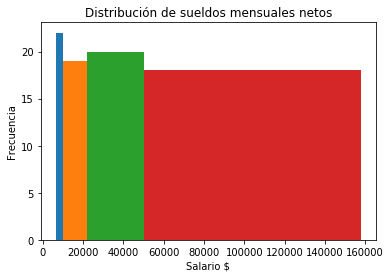

In [26]:
q_1 = sueldos.describe()['SUELDO MENSUAL NETO'].loc['25%']

plt.hist(sueldos['SUELDO MENSUAL NETO'],bins = 1,range=[minimo, q_1]);
plt.hist(sueldos['SUELDO MENSUAL NETO'],bins = 1,range=[q_1+1, q_2]);
plt.hist(sueldos['SUELDO MENSUAL NETO'],bins = 1,range=[q_2+1, q_3]);
plt.hist(sueldos['SUELDO MENSUAL NETO'],bins = 1,range=[q_3+1, maximo])
plt.title('Distribución de sueldos mensuales netos')
plt.xlabel('Salario $')
plt.ylabel('Frecuencia');

#### ¿Cuál es el sueldo base máximo? 

In [10]:
sueldos.describe()['SUELDO BASE'].loc['max']

59804.3279302758

#### ¿Cuál es el sueldo base mínimo?

In [11]:
sueldos.describe()['SUELDO BASE'].loc['min']

3080.4

#### Porcentaje relativo de cada una de las componentes del sueldo mensual neto en cada uno de los puestos

In [12]:
sueldos['%SUELDO NETO'] = 100*sueldos['IMPTO MENSUAL']/np.sum(sueldos['IMPTO MENSUAL'])

In [21]:
sueldos.loc[:,['PUESTO','%SUELDO NETO']].head()

,PUESTO,%SUELDO NETO
0,GOBERNADOR/A DEL ESTADO,7.944592
1,SECRETARIO/A DE ESTADO A,6.488325
2,DIRECTOR/A GENERAL PARAESTATAL A,5.023471
3,SECRETARIO/A DE ESTADO B,5.023471
4,SECRETARIO/A DE ESTADO C,4.336242


#### ¿De cuánto dinero es la diferencia entre el sueldo neto mayor (gobernador del estado) y el sueldo de otros empleados (por ejemplo, alguien de nivel 1, que es el nivel más bajo en la tabla)?

In [14]:
sueldos['DSN'] = np.max(sueldos['SUELDO MENSUAL NETO']) - sueldos['SUELDO MENSUAL NETO']

In [20]:
sueldos.loc[:,['PUESTO','SUELDO MENSUAL NETO','DSN']].head()

,PUESTO,SUELDO MENSUAL NETO,DSN
0,GOBERNADOR/A DEL ESTADO,157698.934369,0.000000
1,SECRETARIO/A DE ESTADO A,132939.199042,24759.735327
2,DIRECTOR/A GENERAL PARAESTATAL A,108033.486450,49665.447919
3,SECRETARIO/A DE ESTADO B,108033.486450,49665.447919
4,SECRETARIO/A DE ESTADO C,96349.090645,61349.843724


In [33]:
sueldos.head(1)

,NIVEL,TIPO,PUESTO,SUELDO BASE,CUOTAS SEGURIDAD SOCIAL,PREVISIÓN SOCIAL,AYUDA X SERVICIOS,APOYO FAMILIAR,GRATIFICACIÓN QUINCENAL,SUELDO MENSUAL BRUTO,IMPTO MENSUAL,ISSEG,ISSSTE,SUELDO MENSUAL NETO,PRIMA VACACIONAL,AGUINALDO,%SUELDO NETO,DSN
0,22,NaN,GOBERNADOR/A DEL ESTADO,59804.32793,5843.07,1913.1,25897,64294.83778,75373.99,233126.325711,69584.321342,5082.66,760.41,157698.934369,10 Días por Año,45 Días por Año,7.944592,0.0


#### ¿Qué porcentaje se da de apoyo en sus diferentes modalidades para cada uno? 

In [81]:
apoyo = []
for i in range(len(sueldos.PUESTO)):
    Ayuda_T = np.sum(sueldos.iloc[i][['CUOTAS SEGURIDAD SOCIAL','PREVISIÓN SOCIAL','AYUDA X SERVICIOS','APOYO FAMILIAR','GRATIFICACIÓN QUINCENAL']])
    apoyo.append(Ayuda_T)

In [86]:
sueldos['APOYO TOTAL'] = apoyo
sueldos['%APOYO TOTAL'] = 100*sueldos['APOYO TOTAL']/np.sum(apoyo)

In [91]:
sueldos.loc[:,['PUESTO','APOYO TOTAL','%APOYO TOTAL']].head()

,PUESTO,APOYO TOTAL,%APOYO TOTAL
0,GOBERNADOR/A DEL ESTADO,173321.997780,6.261298
1,SECRETARIO/A DE ESTADO A,146585.629699,5.295441
2,DIRECTOR/A GENERAL PARAESTATAL A,117189.695456,4.233505
3,SECRETARIO/A DE ESTADO B,117189.695456,4.233505
4,SECRETARIO/A DE ESTADO C,103088.308404,3.724090


#### ¿Cuanto dinero es gastado en es ISSSTE entre todos los puestos?

In [27]:
print('TOTAL EN EL ISSSTE = ',np.sum(sueldos['ISSSTE']))
print('TOTAL EN EL ISSEG = ',np.sum(sueldos['ISSEG']))

TOTAL EN EL ISSSTE =  29411.26871446277
TOTAL EN EL ISSEG =  172122.23464139525
